# Stock price predictions with prophet

### Data is obtained from kaggle, see https://www.kaggle.com/daiearth22/uniqlo-fastretailing-stock-price-prediction


In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

%matplotlib inline

In [2]:
raw = pd.read_csv("data/stock-tokyo.csv", parse_dates=['Date'])
raw = raw.sort_values("Date")
raw.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
1225,2012-01-04,14050,14050,13700,13720,559100,7719804000
1224,2012-01-05,13720,13840,13600,13800,511500,7030811000
1223,2012-01-06,13990,14030,13790,13850,765500,10635609000
1222,2012-01-10,13890,14390,13860,14390,952300,13533413000
1221,2012-01-11,14360,14750,14280,14590,1043400,15191988000


In [3]:
raw.tail()

,Date,Open,High,Low,Close,Volume,Stock Trading
4,2016-12-26,43310,43660,43090,43340,358200,15547803000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
0,2016-12-30,42120,42330,41700,41830,610000,25628028000


### Prophet expects date columns to be named "ds" so lets rename our "Date" column

In [4]:
raw.rename(columns={'Date':'ds'}, inplace=True)
raw.head(1)

,ds,Open,High,Low,Close,Volume,Stock Trading
1225,2012-01-04,14050,14050,13700,13720,559100,7719804000


### We will use the whole 2016 year as our test set, lets split the data!

In [5]:
SPLIT_POINT="2016-01-01"
train = raw[raw['ds'] < SPLIT_POINT]
test = raw[raw['ds'] >= SPLIT_POINT]
print(train.tail(1))
print("------------------------------------------------------------------")
print(test.head(1))

            ds   Open   High    Low  Close  Volume  Stock Trading
245 2015-12-30  42300  42700  41950  42640  388000    16462625000
------------------------------------------------------------------
            ds   Open   High    Low  Close  Volume  Stock Trading
244 2016-01-04  42000  42200  40450  40650  857100    35244549000


## Lets perform some predictions on the total volume

In [6]:
def create_model(columns, raw_data, plot=True):
    cleaned = raw_data[columns]
    cleaned.columns=['ds', 'y']
    if plot:
        cleaned.plot(figsize=(15, 5))
    model = Prophet()
    model.fit(cleaned)
    return model

In [35]:
def predict(model, periods=365, plot=True, include_history=True):
    future = model.make_future_dataframe(periods=periods, include_history=include_history)
    forecast = model.predict(future)
    if plot:
        model.plot(forecast)
        model.plot_components(forecast);
    return forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

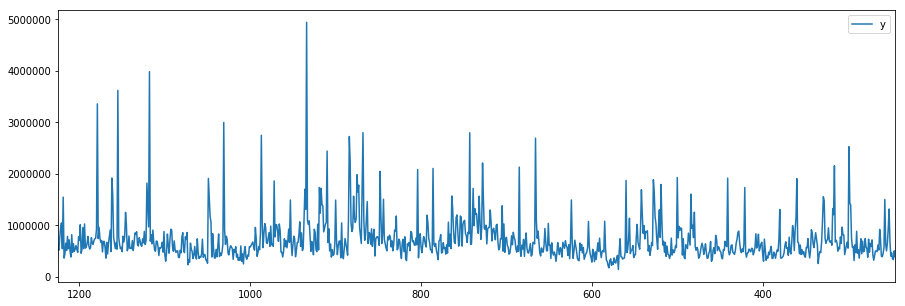

In [8]:
model_volume = create_model(["ds", "Volume"], train)

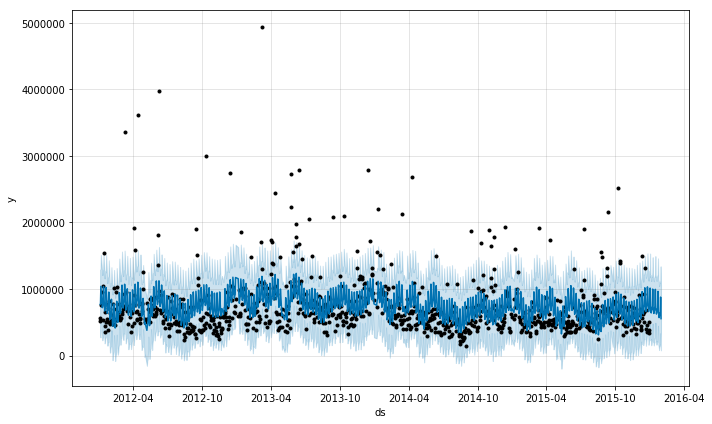

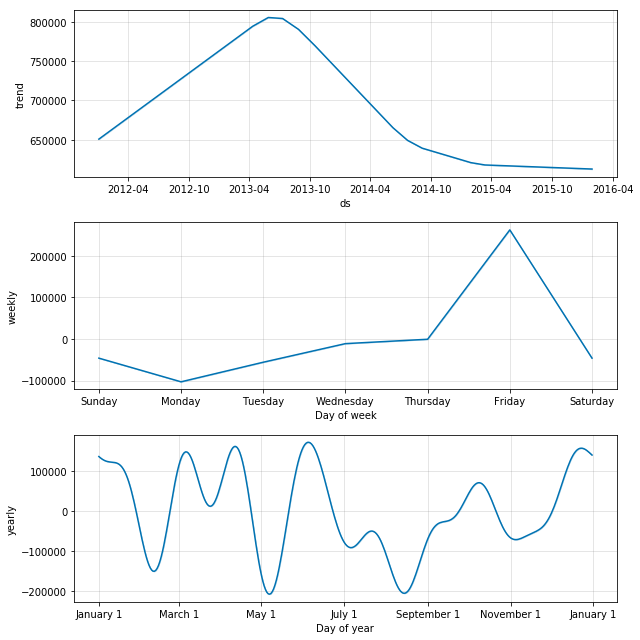

In [9]:
predictions = predict(model_volume, 31)

In [10]:
predictions.head()

,ds,yhat,yhat_lower,yhat_upper
0,2012-01-04,7.694328e+05,290268.884384,1.292953e+06
1,2012-01-05,7.781100e+05,271706.820628,1.299576e+06
2,2012-01-06,1.039490e+06,562552.217544,1.513401e+06
3,2012-01-10,7.190107e+05,229149.852010,1.208993e+06
4,2012-01-11,7.636660e+05,273855.955876,1.286975e+06


In [11]:
predictions.shape

(1012, 4)

In [12]:
predictions.tail()

,ds,yhat,yhat_lower,yhat_upper
1007,2016-01-26,603722.786740,124961.392022,1.083923e+06
1008,2016-01-27,634780.705621,162557.607677,1.114220e+06
1009,2016-01-28,630717.794559,149198.694354,1.088834e+06
1010,2016-01-29,878226.980821,338660.803104,1.340339e+06
1011,2016-01-30,554108.218067,77481.376412,1.061256e+06


In [13]:
my_predictions = predictions[predictions["ds"] >= SPLIT_POINT]

In [14]:
my_predictions

,ds,yhat,yhat_lower,yhat_upper
982,2016-01-01,1.013427e+06,465285.975142,1.533077e+06
983,2016-01-02,7.021984e+05,232139.429029,1.172408e+06
984,2016-01-03,6.994141e+05,245251.114854,1.205603e+06
985,2016-01-04,6.400338e+05,153915.729060,1.118827e+06
986,2016-01-05,6.849447e+05,177551.320066,1.195596e+06
987,2016-01-06,7.278490e+05,226859.239761,1.182411e+06
988,2016-01-07,7.369438e+05,235009.569178,1.253318e+06
989,2016-01-08,9.987263e+05,480069.288723,1.476893e+06
990,2016-01-09,6.897447e+05,202308.016583,1.155384e+06
991,2016-01-10,6.892333e+05,196898.043041,1.145865e+06


In [15]:
expected_values = test[test['ds'] <= "2016-01-30"]

In [16]:
expected_values

,ds,Open,High,Low,Close,Volume,Stock Trading
244,2016-01-04,42000,42200,40450,40650,857100,35244549000
243,2016-01-05,40360,41230,40110,40430,817500,33186218000
242,2016-01-06,40320,41070,39850,40170,808800,32633905000
241,2016-01-07,40000,40500,39010,39050,795900,31474874000
240,2016-01-08,36700,38580,36180,38140,2502700,93345311000
239,2016-01-12,37210,38050,37130,37630,1074300,40337146000
238,2016-01-13,37840,38720,37740,38690,805500,30941515000
237,2016-01-14,37290,37800,36850,37640,863300,32184162000
236,2016-01-15,38120,38490,36810,37000,786100,29473759000
235,2016-01-18,36370,36980,35730,36730,795800,29065971000


### Note that the real data does not contain information for days 2016-01-01, 2016-01-02 and 2016-01-03. We will remove those from the predictions as well, to make sure we have the same values, also we do not have values for Saturdays and Sundays, lets get rid of them too

In [17]:
valid_dates = set(expected_values['ds']) & set(my_predictions['ds'])

In [18]:
valid_dates

{Timestamp('2016-01-04 00:00:00'),
 Timestamp('2016-01-05 00:00:00'),
 Timestamp('2016-01-06 00:00:00'),
 Timestamp('2016-01-07 00:00:00'),
 Timestamp('2016-01-08 00:00:00'),
 Timestamp('2016-01-12 00:00:00'),
 Timestamp('2016-01-13 00:00:00'),
 Timestamp('2016-01-14 00:00:00'),
 Timestamp('2016-01-15 00:00:00'),
 Timestamp('2016-01-18 00:00:00'),
 Timestamp('2016-01-19 00:00:00'),
 Timestamp('2016-01-20 00:00:00'),
 Timestamp('2016-01-21 00:00:00'),
 Timestamp('2016-01-22 00:00:00'),
 Timestamp('2016-01-25 00:00:00'),
 Timestamp('2016-01-26 00:00:00'),
 Timestamp('2016-01-27 00:00:00'),
 Timestamp('2016-01-28 00:00:00'),
 Timestamp('2016-01-29 00:00:00')}

In [19]:
expected_values = expected_values[expected_values['ds'].isin(valid_dates)]
expected_values.set_index(expected_values['ds'], inplace=True)
expected_values.shape

(19, 7)

In [20]:
my_predictions = my_predictions[my_predictions['ds'].isin(valid_dates)]
my_predictions.set_index(my_predictions['ds'], inplace=True)
my_predictions.shape

(19, 4)

In [21]:
final_results = expected_values[['Volume']].copy()
#final_results.set_index(expected_values['ds'], inplace=True)
final_results['prediction'] = my_predictions['yhat']
final_results['precition_lower'] = my_predictions['yhat_lower']
final_results['precition_higher'] = my_predictions['yhat_upper']

In [22]:
#final_results.plot(figsize=(20, 5))
final_results

,Volume,prediction,precition_lower,precition_higher
ds,,,,
2016-01-04,857100,640033.771259,153915.729060,1.118827e+06
2016-01-05,817500,684944.711575,177551.320066,1.195596e+06
2016-01-06,808800,727849.042832,226859.239761,1.182411e+06
2016-01-07,795900,736943.770242,235009.569178,1.253318e+06
2016-01-08,2502700,998726.346970,480069.288723,1.476893e+06
2016-01-12,1074300,678728.390890,211142.618573,1.174625e+06
2016-01-13,805500,723002.186625,263057.191112,1.182856e+06
2016-01-14,863300,732858.756160,254127.903028,1.217605e+06
2016-01-15,786100,994665.821470,492283.176551,1.493445e+06


In [23]:
 my_predictions['yhat']

ds
2016-01-04    640033.771259
2016-01-05    684944.711575
2016-01-06    727849.042832
2016-01-07    736943.770242
2016-01-08    998726.346970
2016-01-12    678728.390890
2016-01-13    723002.186625
2016-01-14    732858.756160
2016-01-15    994665.821470
2016-01-18    622625.210934
2016-01-19    665633.604119
2016-01-20    705184.514222
2016-01-21    709376.311413
2016-01-22    964659.389446
2016-01-25    569210.998330
2016-01-26    603722.786740
2016-01-27    634780.705621
2016-01-28    630717.794559
2016-01-29    878226.980821
Name: yhat, dtype: float64

## Lets put all this into a simple easy-to-use function

In [24]:
def prepare_predictions(predictions_raw, expected_values=None, expected_values_column=None, split_date=None):
    valid_dates = set(predictions_raw['ds'])
    
    if expected_values is not None:
        expected_values = expected_values[expected_values['ds'] <= split_date]
        valid_dates = set(expected_values['ds']) & set(predictions_raw['ds'])
        expected_values = expected_values[expected_values['ds'].isin(valid_dates)]
        expected_values.set_index(expected_values['ds'], inplace=True)
        
    my_predictions = predictions_raw[predictions_raw['ds'].isin(valid_dates)]
    my_predictions.set_index(my_predictions['ds'], inplace=True)
    
    final_results = pd.DataFrame(my_predictions['ds'], columns=['ds'])
    final_results['prediction'] = my_predictions['yhat']
    final_results['precition_lower'] = my_predictions['yhat_lower']
    final_results['precition_higher'] = my_predictions['yhat_upper']

    if expected_values is not None:
        final_results['actual_value'] = expected_values[expected_values_column]
        
    return final_results

In [25]:
output = prepare_predictions(my_predictions, expected_values, "Volume", "2016-01-31")

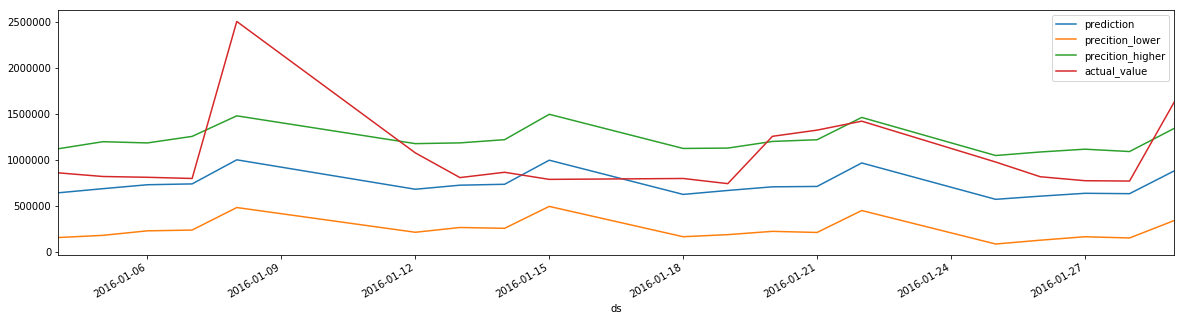

In [26]:
output.plot(figsize=(20, 5))

## Lets try a different model now

#### Instead of trying to predict the volume, lets try to predict the price (and get rich!)

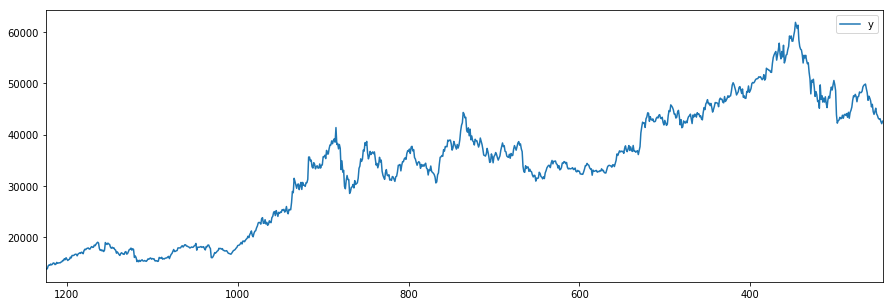

In [27]:
model_price = create_model(["ds", "Close"], train)

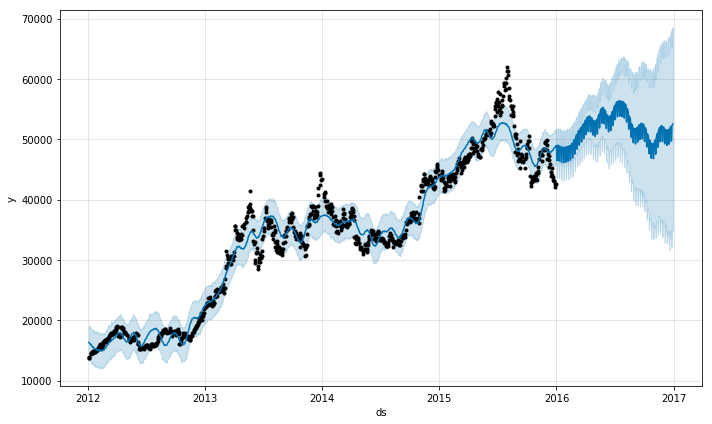

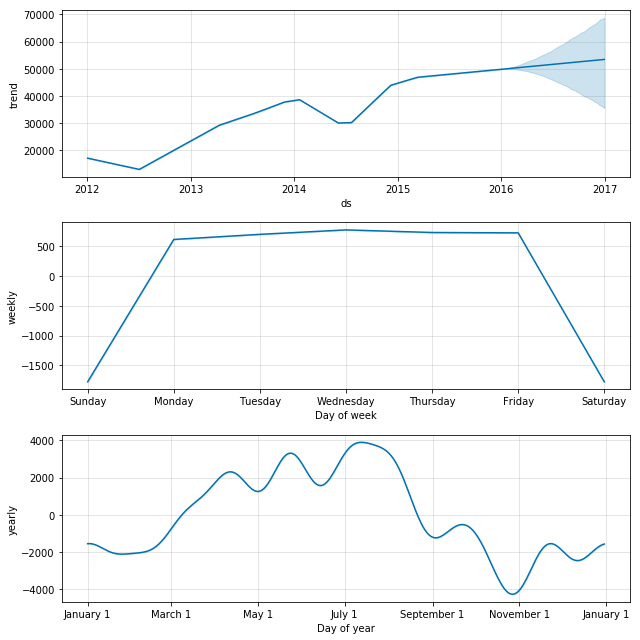

In [28]:
predictions_price = predict(model_price, 365)

In [29]:
output_price = prepare_predictions(predictions_price, expected_values, "Close", "2016-12-31")

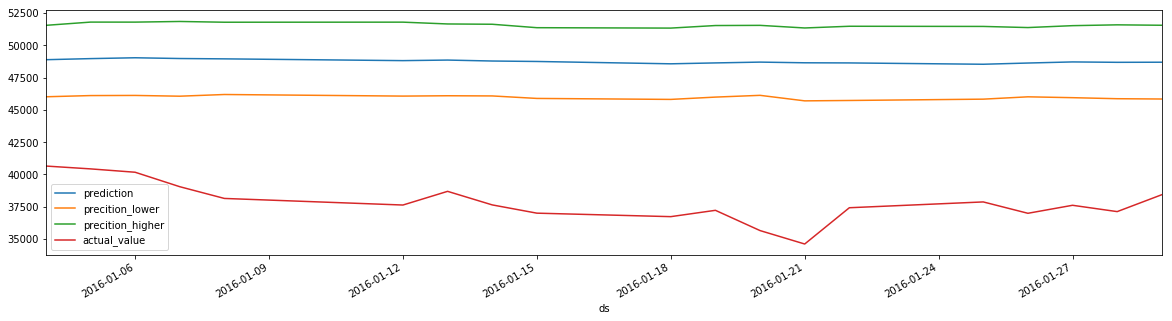

In [30]:
output_price.plot(figsize=(20, 5))

In [33]:
x = predictions_price[predictions_price['ds'] >= "2016-01-01"]
x.set_index(x['ds'], inplace=True)

In [34]:
x

,ds,yhat,yhat_lower,yhat_upper
ds,,,,
2016-01-01,2016-01-01,48956.237760,46002.470645,51752.936649
2016-01-02,2016-01-02,46478.156441,43750.325956,49160.014000
2016-01-03,2016-01-03,46491.950253,43667.897115,49357.675741
2016-01-04,2016-01-04,48887.232099,46015.606018,51549.019347
2016-01-05,2016-01-05,48971.428181,46108.542873,51800.245106
2016-01-06,2016-01-06,49037.432519,46119.667268,51798.784714
2016-01-07,2016-01-07,48979.017857,46060.472252,51849.335485
2016-01-08,2016-01-08,48952.783990,46191.557646,51790.594743
2016-01-09,2016-01-09,46428.350195,43605.250779,49200.262703
